In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pywaffle import Waffle

In [4]:
sample=pd.read_csv('sample.csv')
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [3]:
sample

,user_id,is_5g
0,32cd3ea929129a5af90579eb444958fa,0.0
1,e25355ae12b4ebab4427eef6719a5ade,0.0
2,8a3aca94fcc94eb833b8a0be20ca9b0f,0.0
3,2f14bfc318552928e6ae2b6f2c54985f,0.0
4,5ca81abebce497ab2063a87658e48798,0.0
...,...,...
299995,52db0a9a811432f3b54eaa8aec6ae421,0.0
299996,63d174153429a4885e69ab190148d525,0.0
299997,ba6a340c69a641086aecfb015282113d,0.0
299998,dac894be5f6b6a1a9d8764bf2d71bec6,0.0


In [4]:
train.head()

,prov_id,area_id,user_id,chnl_type,service_type,product_type,innet_months,total_times,total_flux,total_fee,...,active_days20,active_days21,active_days22,active_days23,game_app_flux,live_app_flux,video_app_flux,city_5g_ratio,city_level,is_5g
0,81,V0513400,5f950e1751acd6a6fa9bf88eb5560c78,7,4,5,29,1.149441,10.864754,93.000,...,4.0,2.0,0.0,0.0,0.0,0.00000,5526.494937,0.000512,7.0,1.0
1,36,V0330200,40015dd14b779d1d3d4e8e2536c6115a,7,4,3,5,0.688337,6.814911,89.912,...,2.0,2.0,0.0,0.0,0.0,0.00000,0.000000,0.000356,3.0,0.0
2,76,V0410100,72f4ddd94488cc2f30bc83b82f55d3eb,7,4,4,104,1.102318,9.492543,62.670,...,0.0,3.0,0.0,0.0,0.0,0.00000,1235.091633,0.000490,3.0,0.0
3,84,V0610100,845983a3e7973b0016c73071f4c70c1c,10,4,5,15,0.122139,5.008418,75.798,...,4.0,4.0,0.0,0.0,0.0,9.13548,1194.355876,0.000328,2.0,0.0
4,85,V0520100,0326fbd12145c5378baf5168a8e9c8fe,7,4,3,21,0.158738,9.745640,54.500,...,20.0,0.0,6.0,1.0,0.0,0.00000,26.783371,0.000830,6.0,0.0


In [5]:
test.tail()

,prov_id,area_id,user_id,chnl_type,service_type,product_type,innet_months,total_times,total_flux,total_fee,...,active_days19,active_days20,active_days21,active_days22,active_days23,game_app_flux,live_app_flux,video_app_flux,city_5g_ratio,city_level
299995,19,V0140400,52db0a9a811432f3b54eaa8aec6ae421,10,4,5,102,0.963293,6.631132,58.033333,...,3.0,13.0,0.0,0.0,0.0,0.0,0.000000,62.121061,0.000053,7.0
299996,91,V0210200,63d174153429a4885e69ab190148d525,10,4,2,11,0.190792,8.771428,59.936667,...,29.0,28.0,17.0,26.0,2.0,0.0,3.843028,3389.221919,0.000201,3.0
299997,30,V0342100,ba6a340c69a641086aecfb015282113d,7,4,5,125,0.778433,5.400735,50.341667,...,5.0,5.0,4.0,0.0,0.0,0.0,0.000000,81.225115,0.000164,7.0
299998,86,V0532800,dac894be5f6b6a1a9d8764bf2d71bec6,6,4,5,25,1.836341,9.735715,87.025000,...,6.0,4.0,0.0,0.0,6.0,0.0,0.000000,0.000000,0.000225,7.0
299999,71,V0420100,8f5de9d3cb45320e1a2dea009d77f7b3,7,4,2,82,0.779492,8.465780,99.000000,...,19.0,23.0,11.0,6.0,0.0,0.0,0.000000,300.541179,0.000319,2.0


In [6]:
train.area_id.value_counts()

area_id
V0110000     33978
V0440100     28544
V0440300     21528
V0310000     21486
V0410100     15301
             ...  
V04601007       30
V04602003       28
V04601008       27
V04600034       13
V0132000         7
Name: count, Length: 358, dtype: int64

In [5]:
days=['active_days01', 'active_days02','active_days03', 'active_days04', 'active_days05','active_days06','active_days07', 'active_days08', 'active_days09', 
'active_days10','active_days11', 'active_days12', 'active_days13','active_days14','active_days15', 'active_days16', 'active_days17',
'active_days18','active_days19', 'active_days20', 'active_days21','active_days22','active_days23']
train.drop(columns=days,inplace=True)
test.drop(columns=days,inplace=True)

In [11]:
train.shape,test.shape

((700000, 37), (300000, 36))

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   prov_id               700000 non-null  int64  
 1   area_id               700000 non-null  object 
 2   user_id               700000 non-null  object 
 3   chnl_type             700000 non-null  int64  
 4   service_type          700000 non-null  int64  
 5   product_type          700000 non-null  int64  
 6   innet_months          700000 non-null  int64  
 7   total_times           700000 non-null  float64
 8   total_flux            700000 non-null  float64
 9   total_fee             700000 non-null  float64
 10  pay_fee               700000 non-null  float64
 11  sex                   700000 non-null  int64  
 12  age                   700000 non-null  int64  
 13  manu_name             700000 non-null  int64  
 14  term_type             700000 non-null  int64  
 15  

In [13]:
test.nunique()

prov_id                     31
area_id                    358
user_id                 300000
chnl_type                   10
service_type                 5
product_type                 5
innet_months               281
total_times             230225
total_flux              295480
total_fee                64746
pay_fee                  40791
sex                          2
age                         43
manu_name                   12
term_type                    6
max_rat_flag                 4
is_5g_base_cover             2
is_work_5g_cover             2
is_home_5g_cover             2
is_work_5g_cover_l01         2
is_home_5g_cover_l01         2
is_work_5g_cover_l02         2
is_home_5g_cover_l02         2
activity_type               12
is_act_expire                3
comp_type                    7
call_days                  674
re_call10                 4984
short_call10              3409
long_call10               1493
bank_cnt                  2641
game_app_flux              433
live_app

In [15]:
train.isnull().sum()

prov_id                 0
area_id                 0
user_id                 0
chnl_type               0
service_type            0
product_type            0
innet_months            0
total_times             0
total_flux              0
total_fee               0
pay_fee                 0
sex                     0
age                     0
manu_name               0
term_type               0
max_rat_flag            0
is_5g_base_cover        0
is_work_5g_cover        0
is_home_5g_cover        0
is_work_5g_cover_l01    0
is_home_5g_cover_l01    0
is_work_5g_cover_l02    0
is_home_5g_cover_l02    0
activity_type           0
is_act_expire           0
comp_type               0
call_days               0
re_call10               0
short_call10            0
long_call10             0
bank_cnt                0
game_app_flux           0
live_app_flux           0
video_app_flux          0
city_5g_ratio           0
city_level              0
is_5g                   0
dtype: int64

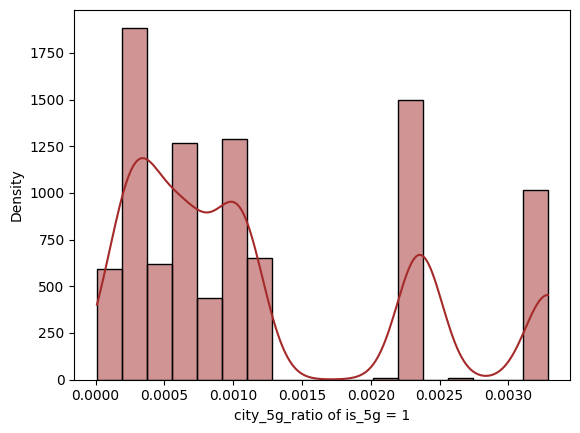

In [16]:
a=sns.histplot(train[train['is_5g']==1]['city_5g_ratio'],kde=True,color='brown')
a.set_xlabel("city_5g_ratio of is_5g = 1")
a.set_ylabel("Density")
a.tick_params(labelsize=10)

Text(0, 0.5, 'Density')

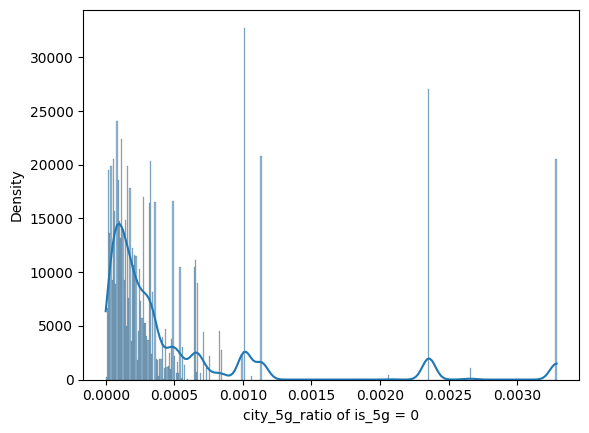

In [17]:
b=sns.histplot(train[train['is_5g']==0]['city_5g_ratio'],kde=True)
b.set_xlabel("city_5g_ratio of is_5g = 0")
b.set_ylabel("Density")

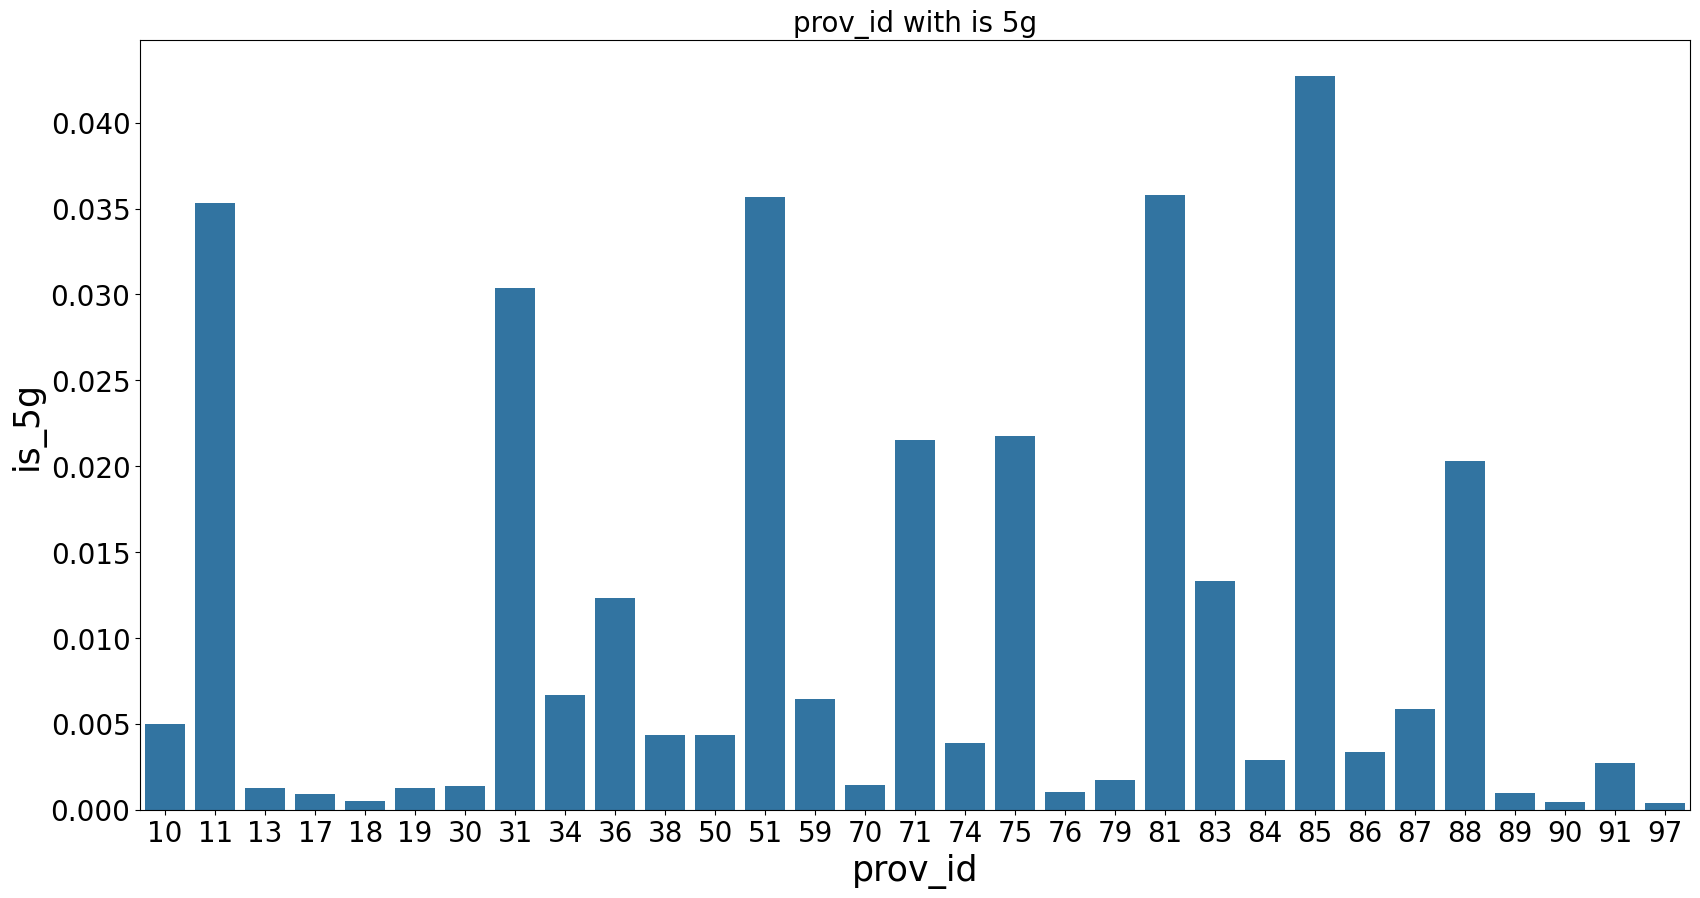

In [23]:
plt.figure(figsize=[20,10])
c=sns.barplot(x='prov_id',y='is_5g',data=train,errorbar=None)
c.axes.set_title('prov_id with is 5g',fontsize=20)
c.set_xlabel('prov_id',fontsize=25)
c.set_ylabel('is_5g',fontsize=25)
c.tick_params(labelsize=20)

Text(0, 0.5, 'Pay Fee')

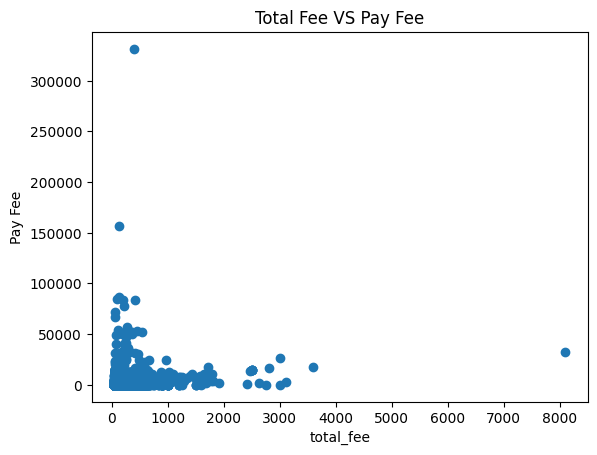

In [24]:
plt.scatter(train['total_fee'],train['pay_fee'])
plt.title('Total Fee VS Pay Fee')
plt.xlabel('total_fee')
plt.ylabel('Pay Fee')

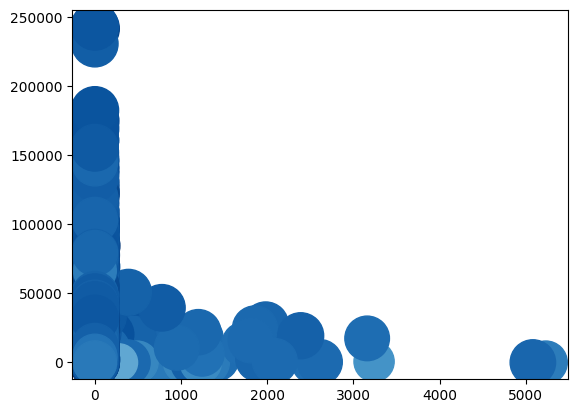

In [25]:
x=train['game_app_flux']
y=train['video_app_flux']
z=train['total_flux']
plt.scatter(x,y,s=z*100,c=z,cmap='Blues')

Text(0, 0.5, 'city_5g_ratio')

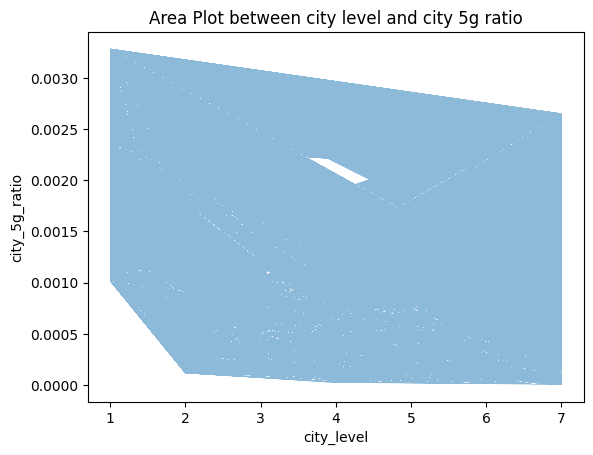

In [26]:
fig,ax=plt.subplots()
ax.fill_between(test['city_level'],test['city_5g_ratio'],alpha=0.5)
ax.set_title('Area Plot between city level and city 5g ratio')
ax.set_xlabel('city_level')
ax.set_ylabel('city_5g_ratio')

In [27]:
df=train.groupby('activity_type').count()
df

,prov_id,area_id,user_id,chnl_type,service_type,product_type,innet_months,total_times,total_flux,total_fee,...,re_call10,short_call10,long_call10,bank_cnt,game_app_flux,live_app_flux,video_app_flux,city_5g_ratio,city_level,is_5g
activity_type,,,,,,,,,,,,,,,,,,,,,
1,28371,28371,28371,28371,28371,28371,28371,28371,28371,28371,...,28371,28371,28371,28371,28371,28371,28371,28371,28371,28371
2,12300,12300,12300,12300,12300,12300,12300,12300,12300,12300,...,12300,12300,12300,12300,12300,12300,12300,12300,12300,12300
3,76604,76604,76604,76604,76604,76604,76604,76604,76604,76604,...,76604,76604,76604,76604,76604,76604,76604,76604,76604,76604
4,557619,557619,557619,557619,557619,557619,557619,557619,557619,557619,...,557619,557619,557619,557619,557619,557619,557619,557619,557619,557619
5,6781,6781,6781,6781,6781,6781,6781,6781,6781,6781,...,6781,6781,6781,6781,6781,6781,6781,6781,6781,6781
6,115,115,115,115,115,115,115,115,115,115,...,115,115,115,115,115,115,115,115,115,115
7,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
8,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
9,8093,8093,8093,8093,8093,8093,8093,8093,8093,8093,...,8093,8093,8093,8093,8093,8093,8093,8093,8093,8093


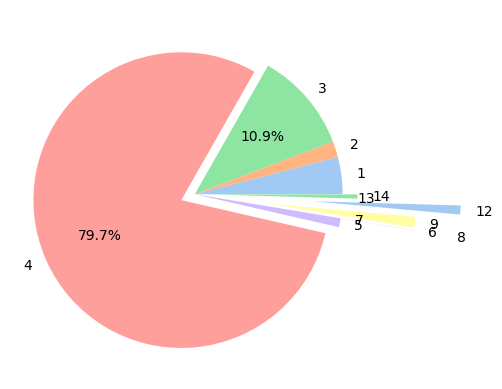

In [29]:
data=df.user_id
label=list(df.index)
colors=sns.color_palette('pastel')[0:9]
def my_autopct(pct):
    return '%1.1f%%' % pct if pct > 5 else ''
plt.pie(data,labels=label,colors=colors,autopct=my_autopct,explode=[0,0,0,0.1,0,0.5,0,0.7,0.5,0.8,0,0.1])
plt.show()

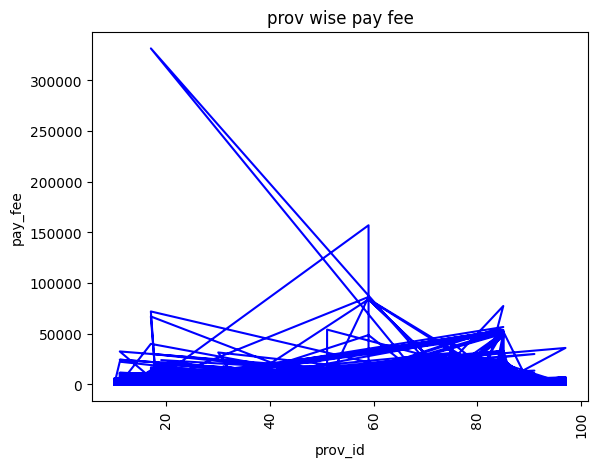

In [30]:
plt.plot(train['prov_id'],train['pay_fee'],color='blue')
plt.title('prov wise pay fee')
plt.xlabel('prov_id')
plt.ylabel('pay_fee')
plt.xticks(rotation='vertical')
plt.show()

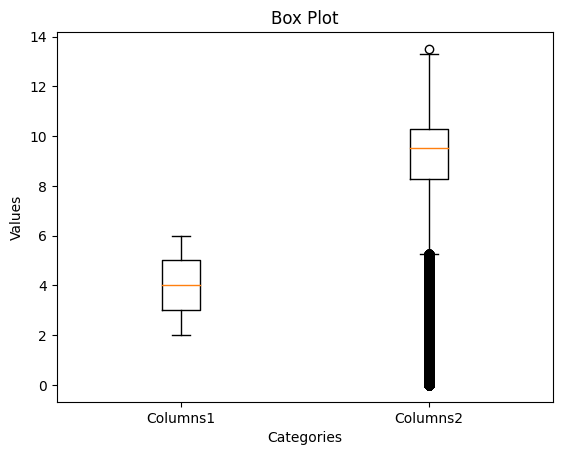

In [31]:
columns1=train['product_type']
columns2=train['total_flux']
fig,ax=plt.subplots()
ax.boxplot([columns1,columns2],labels=['Columns1','Columns2'])
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Box Plot')
plt.show()

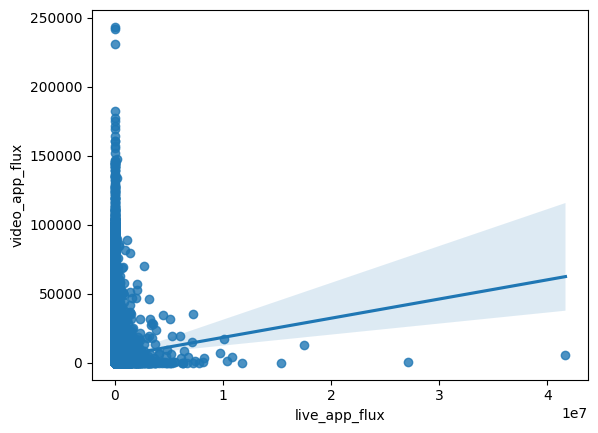

In [32]:
sns.regplot(x="live_app_flux",y="video_app_flux",data=train)
plt.show()

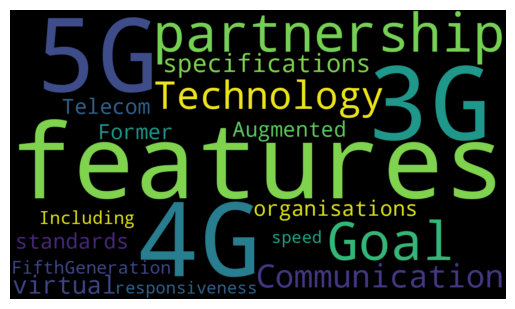

In [33]:
from wordcloud import WordCloud, STOPWORDS


with open("5g.txt", "r") as file:
    text = file.read()

wordcloud = WordCloud(width=1200, height=700, background_color="black", max_words=200, stopwords=STOPWORDS).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [6]:
x=train.drop(columns=['user_id','is_5g','area_id'])
y=train['is_5g']

In [7]:
x_train,x_validation,y_train,y_validation=train_test_split(x,y,test_size=0.5,random_state=42)

In [8]:
x_test=test.drop('user_id',axis=1)
y_test=sample['is_5g']

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model1 = LogisticRegression(solver='liblinear')
model1.fit(x_train, y_train)
y_pred = model1.predict(x_validation)
acc1=accuracy_score(y_validation,y_pred)
acc1

/home/rgukt/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9865457142857142

In [16]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)
y_pred = model2.predict(x_validation)
acc2=accuracy_score(y_validation,y_pred)
acc2

0.9727971428571428

In [17]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(x_train, y_train)
y_pred = model3.predict(x_validation)
acc3=accuracy_score(y_validation,y_pred)
acc3

0.9866171428571429

In [18]:
from xgboost import XGBClassifier
model4 = XGBClassifier()
model4.fit(x_train,y_train)
y_pred = model4.predict(x_validation)
acc4=accuracy_score(y_validation,y_pred)
acc4

0.9864714285714286

In [21]:
acc={'Logistic':acc1*100,'RandomForest':acc3*100,'XGBoost':acc4*100,'DecisonTree':acc2*100}